# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from tabulate import tabulate

# Configs

In [63]:
LABELED_PATH = "../data/labels/labels.parquet"
PREDICTED_XGB_PATH = "../data/results/xgb_predictions.parquet"
PREDICTED_CB_PATH = "../data/results/cb_predictions.parquet"
PREDICTED_XGB_ARIMA_PATH = "../data/results/xgb_predictions_tuned.parquet"
PREDICTED_REGRESSION_PATH = "../data/results/ridge_predictions.parquet"
PREDICTED_ARIMA_PATH = "../data/results/arima_predict.parquet"
TEST_START_DATE = '2023-04-20'
LAST_WEEK_TEST_START_DATE = '2023-04-13'
HIGH_DEMAND_NUMS = 50
MID_DEMAND_NUMS = 100
SAVE_PLOT_PATH = '../data/pngs/'
warnings.filterwarnings('ignore')

In [64]:
report_dict = {
    'high_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },
    'mid_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },    
    'low_demand_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
        
    },
    'all_locations':{
        'MAPE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'MAE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        },
        'RMSE':{
            'baseline_last_week':None,
            'model_regression':None,
            'model_xgboost':None,
            'model_catboost':None
        }
    },
    
    
}

In [65]:
predictions_dict = {
    'baseline_last_day':None,
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_catboost':None
}

In [66]:
sorted_locations_dict={
    'baseline_last_week':None,
    'model_regression':None,
    'model_xgboost':None,
    'model_catboost':None
}

In [67]:
predictions_mean_error_dict={
    
    'baseline_last_week':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_regression':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_xgboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
    'model_catboost':
    {
        'Location':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'Date':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                },
        'day_of_week':
                {
                'high_demand_loc':None,
                'mid_demand_loc':None,
                'low_demand_loc':None,
                'all_loc':None
                }
    },
}

# Load Data

## Load labeled data

In [68]:
labeled_df = pd.read_parquet(LABELED_PATH)
print(labeled_df.shape)
labeled_df.head()

(35505, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-01-01       36.74    40.0        276.00              2.0   
1         1 2023-01-02       45.33    31.0        279.50              1.0   
2         1 2023-01-03        0.54    27.0        351.00              1.0   
3         1 2023-01-04        2.60     7.0        204.69              2.0   
4         1 2023-01-05       68.41    15.0        213.00              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        250.0    0.0         5.0                   0.0      393.43      0   
1        253.0    0.0         5.0                   0.0      363.76      0   
2        350.0    0.0         5.0                   0.0      296.50      0   
3        150.0    0.0         5.0                   0.0      194.64      0   
4        200.0    2.5         5.0                   0.0      200.13      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

In [69]:
test_df = labeled_df.loc[labeled_df['Date']>=TEST_START_DATE]
test_df = test_df.reset_index(drop = True)
print(test_df.shape)
test_df.head()

(6838, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

## Load Predicted Data

In [70]:
predictions_dict['model_xgboost'] = pd.read_parquet(PREDICTED_XGB_PATH)
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(6838, 3)


Location       Date  Predicted_demand
0         1 2023-04-20         15.238807
1         1 2023-04-21          8.858619
2         1 2023-04-22         11.951311
3         1 2023-04-23         22.695147
4         1 2023-04-24         21.294144

In [71]:
predictions_dict['model_catboost'] = pd.read_parquet(PREDICTED_CB_PATH)
print(predictions_dict['model_catboost'].shape)
predictions_dict['model_catboost'].head()

(6838, 3)


Location       Date  Predicted_demand
0         1 2023-04-20         12.990699
1         1 2023-04-21         11.989914
2         1 2023-04-22         12.248957
3         1 2023-04-23          9.571464
4         1 2023-04-24          9.084334

In [72]:
predictions_dict['model_regression'] = pd.read_parquet(PREDICTED_CB_PATH)
print(predictions_dict['model_regression'].shape)
predictions_dict['model_regression'].head()

(6838, 3)


Location       Date  Predicted_demand
0         1 2023-04-20         12.990699
1         1 2023-04-21         11.989914
2         1 2023-04-22         12.248957
3         1 2023-04-23          9.571464
4         1 2023-04-24          9.084334

### BaseLine Models

In [73]:
def baseline_predict(dataset, shift_val):
    predicted_demand = dataset.groupby(['Location'])['Demand'].shift(shift_val)
    predicted_data = pd.DataFrame(dataset[['Location', 'Date']])
    predicted_data['Predicted_demand'] = predicted_demand
    return predicted_data

In [74]:
baseline_test_df = labeled_df.loc[labeled_df['Date']>=LAST_WEEK_TEST_START_DATE]
baseline_test_df = baseline_test_df.reset_index(drop = True)
print(baseline_test_df.shape)
baseline_test_df.head()

(8679, 17)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-13       42.67    18.0         163.2              2.0   
1         1 2023-04-14        0.05    12.0         200.0              1.0   
2         1 2023-04-15       25.09    15.0         262.8              1.0   
3         1 2023-04-16       25.45    24.0         158.4              1.0   
4         1 2023-04-17        1.35    16.0         301.2              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        135.0    2.5         5.0                   0.0      143.10      0   
1        175.0    0.0         5.0                   0.0      156.19      0   
2        199.0    0.0         5.0                   0.0      217.89      0   
3        140.0    0.0         5.0                   0.0      198.82      0   
4        250.0    0.0         5.0                   0.0      187.11      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  
0         0    1          0       0              0  
1         0    1          0       0              0  
2         0    1          0       0              0  
3         0    1          0       0              0  
4         0    1          0       0              0

In [75]:
predictions_dict['baseline_last_week'] = baseline_predict(baseline_test_df, 7)
predictions_dict['baseline_last_week'] = predictions_dict['baseline_last_week'].dropna()
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(6845, 3)


Location       Date  Predicted_demand
7          1 2023-04-20              18.0
8          1 2023-04-21              12.0
9          1 2023-04-22              15.0
10         1 2023-04-23              24.0
11         1 2023-04-24              16.0

### Join Predictions and Actual

In [76]:
def join_actual_predict(actual_df, predicted_df):
    actual_predicted_df = actual_df.merge(predicted_df, how='left', on=['Location', 'Date'])
    actual_predicted_df['day_of_week'] = actual_predicted_df['Date'].dt.dayofweek
    return actual_predicted_df

In [77]:
predictions_dict['baseline_last_week'] = join_actual_predict(test_df,predictions_dict['baseline_last_week'])
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()

(6890, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0              18.0   
1         0    1          0       0              0              12.0   
2         0    1          0       0              0              15.0   
3         0    1          0       0              0              24.0   
4         0    1          0       0              0              16.0   

   day_of_week  
0            3  
1            4  
2            5  
3            6  
4            0

In [78]:
predictions_dict['model_catboost'] = join_actual_predict(test_df,predictions_dict['model_catboost'])
print(predictions_dict['model_catboost'].shape)
predictions_dict['model_catboost'].head()

(6890, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         12.990699   
1         0    1          0       0              0         11.989914   
2         0    1          0       0              0         12.248957   
3         0    1          0       0              0          9.571464   
4         0    1          0       0              0          9.084334   

   day_of_week  
0            3  
1            4  
2            5  
3            6  
4            0

In [79]:
predictions_dict['model_xgboost'] = join_actual_predict(test_df,predictions_dict['model_xgboost'])
print(predictions_dict['model_xgboost'].shape)
predictions_dict['model_xgboost'].head()

(6890, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         15.238807   
1         0    1          0       0              0          8.858619   
2         0    1          0       0              0         11.951311   
3         0    1          0       0              0         22.695147   
4         0    1          0       0              0         21.294144   

   day_of_week  
0            3  
1            4  
2            5  
3            6  
4            0

In [80]:
predictions_dict['model_regression'] = join_actual_predict(test_df,predictions_dict['model_regression'])
print(predictions_dict['model_regression'].shape)
predictions_dict['model_regression'].head()

(6890, 19)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         12.990699   
1         0    1          0       0              0         11.989914   
2         0    1          0       0              0         12.248957   
3         0    1          0       0              0          9.571464   
4         0    1          0       0              0          9.084334   

   day_of_week  
0            3  
1            4  
2            5  
3            6  
4            0

### Sort Locations by Demand

In [81]:
def sort_locations_on_demand(predictions_dict,sorted_locations_dict):
    for label,predictions_df in predictions_dict.items():
        if (predictions_df is not None):
            sorted_index = predictions_df.groupby('Location')['Demand'].aggregate(['sum']).sort_values('sum', ascending=False)
            sorted_index = sorted_index.reset_index()
            sorted_locations_dict[label] = sorted_index

In [82]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['model_xgboost'].shape)
sorted_locations_dict['model_xgboost'].head()

(262, 2)


Location       sum
0       132  152378.0
1       237  147803.0
2       161  135701.0
3       236  130246.0
4       138  108341.0

In [83]:
predictions_dict['model_xgboost'].head()

Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  tip_amount  Bronx  \
0        133.0    0.0         5.0                   0.0      256.00      0   
1        168.2    2.5         5.0                   0.0      160.95      0   
2        250.0    1.0         5.0                   0.0      127.75      0   
3        130.0    0.0         5.0                   0.0      253.49      0   
4        122.0    0.0         5.0                   0.0      123.05      0   

   Brooklyn  EWR  Manhattan  Queens  Staten Island  Predicted_demand  \
0         0    1          0       0              0         15.238807   
1         0    1          0       0              0          8.858619   
2         0    1          0       0              0         11.951311   
3         0    1          0       0              0         22.695147   
4         0    1          0       0              0         21.294144   

   day_of_week  
0            3  
1            4  
2            5  
3            6  
4            0

In [84]:
sort_locations_on_demand(predictions_dict, sorted_locations_dict)
print(sorted_locations_dict['baseline_last_week'].shape)
sorted_locations_dict['baseline_last_week'].head()

(262, 2)


Location       sum
0       132  152378.0
1       237  147803.0
2       161  135701.0
3       236  130246.0
4       138  108341.0

# Mean error Calculation

### Error Columns

In [85]:
def calculate_error(actual_predicted_dict: dict):
    for label,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            actual_predicted_df['error'] = np.abs(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_predicted_df['squared_error'] = np.square(
                actual_predicted_df['Demand']-actual_predicted_df['Predicted_demand']
                )
            actual_Demand_df = np.where(actual_predicted_df['Demand']==0, 1, actual_predicted_df['Demand'])
            actual_predicted_df['percentage_error'] = (
                actual_predicted_df['error']/actual_Demand_df
                )*100
            

In [86]:
calculate_error(predictions_dict)


In [87]:
print(predictions_dict['baseline_last_week'].shape)
predictions_dict['baseline_last_week'].head()


(6890, 22)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  EWR  \
0        133.0    0.0         5.0                   0.0  ...         0    1   
1        168.2    2.5         5.0                   0.0  ...         0    1   
2        250.0    1.0         5.0                   0.0  ...         0    1   
3        130.0    0.0         5.0                   0.0  ...         0    1   
4        122.0    0.0         5.0                   0.0  ...         0    1   

   Manhattan  Queens  Staten Island  Predicted_demand  day_of_week  error  \
0          0       0              0              18.0            3    3.0   
1          0       0              0              12.0            4    3.0   
2          0       0              0              15.0            5    1.0   
3          0       0              0              24.0            6    0.0   
4          0       0              0              16.0            0    6.0   

   squared_error  percentage_error  
0            9.0             20.00  
1            9.0             20.00  
2            1.0              6.25  
3            0.0              0.00  
4           36.0             60.00  

[5 rows x 22 columns]

In [88]:
predictions_dict['baseline_last_week'].tail()

Location       Date  trip_dists  Demand  total_amount  passenger_count  \
6885       265 2023-05-11      937.04   134.0        331.20              1.0   
6886       265 2023-05-12      860.67   124.0        422.85              1.0   
6887       265 2023-05-13      649.59    87.0        340.80              1.0   
6888       265 2023-05-14      594.70   127.0        406.80              1.0   
6889       265 2023-05-15      338.41    87.0        386.00              1.0   

      fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  \
6885       275.00    2.5        99.0                   0.0  ...         0   
6886       371.85    2.5        99.0                   0.0  ...         0   
6887       300.00    5.0        99.0                   0.0  ...         0   
6888       400.00    2.5        99.0                   0.0  ...         0   
6889       385.00    5.0        99.0                   0.0  ...         0   

      EWR  Manhattan  Queens  Staten Island  Predicted_demand  day_of_week  \
6885    0          0       0              0              66.0            3   
6886    0          0       0              0              64.0            4   
6887    0          0       0              0              60.0            5   
6888    0          0       0              0              70.0            6   
6889    0          0       0              0              97.0            0   

      error  squared_error  percentage_error  
6885   68.0         4624.0         50.746269  
6886   60.0         3600.0         48.387097  
6887   27.0          729.0         31.034483  
6888   57.0         3249.0         44.881890  
6889   10.0          100.0         11.494253  

[5 rows x 22 columns]

In [89]:
print(predictions_dict['model_catboost'].shape)
predictions_dict['model_catboost'].head()

(6890, 22)


Location       Date  trip_dists  Demand  total_amount  passenger_count  \
0         1 2023-04-20       21.26    15.0        157.50              1.0   
1         1 2023-04-21        0.00    15.0        177.75              1.0   
2         1 2023-04-22       31.29    16.0        251.00              1.0   
3         1 2023-04-23       16.34    24.0        174.90              1.0   
4         1 2023-04-24        0.11    10.0        147.60              2.0   

   fare_amount  extra  RatecodeID  congestion_surcharge  ...  Brooklyn  EWR  \
0        133.0    0.0         5.0                   0.0  ...         0    1   
1        168.2    2.5         5.0                   0.0  ...         0    1   
2        250.0    1.0         5.0                   0.0  ...         0    1   
3        130.0    0.0         5.0                   0.0  ...         0    1   
4        122.0    0.0         5.0                   0.0  ...         0    1   

   Manhattan  Queens  Staten Island  Predicted_demand  day_of_week      error  \
0          0       0              0         12.990699            3   2.009301   
1          0       0              0         11.989914            4   3.010086   
2          0       0              0         12.248957            5   3.751043   
3          0       0              0          9.571464            6  14.428536   
4          0       0              0          9.084334            0   0.915666   

   squared_error  percentage_error  
0       4.037292         13.395342  
1       9.060620         20.067243  
2      14.070325         23.444020  
3     208.182639         60.118898  
4       0.838445          9.156663  

[5 rows x 22 columns]

### Aggregate Error Columns

In [31]:
def calculate_mean_error(actual_predicted_dict: dict, predictions_mean_dict: dict):
    per_columns=['Location', 'Date', 'day_of_week']
    for model,actual_predicted_df in actual_predicted_dict.items():
        if (actual_predicted_df is not None):
            sorted_index = sorted_locations_dict[model]['Location']
            high_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[:HIGH_DEMAND_NUMS])]
            mid_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])]
            low_demand_actual_predicted_df = actual_predicted_df.loc[actual_predicted_df['Location'].isin(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])]
            for per in per_columns:
                high_demand_error_df = high_demand_actual_predicted_df[[per,'Demand','error','squared_error', 'percentage_error',]] 
                mid_demand_error_df = mid_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                low_demand_error_df = low_demand_actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']] 
                all_error_df = actual_predicted_df[[per,'Demand','error','squared_error','percentage_error']]
                
                high_demand_mean_df = (
                    high_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean'))) 
                mid_demand_mean_df = (
                    mid_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                low_demand_mean_df = (
                    low_demand_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                            mae=('error','mean'),
                                                            mse=('squared_error','mean'),
                                                            demand_mean=('Demand','mean')))
                all_mean_df = (
                    all_error_df.groupby(per).agg(mape=('percentage_error','mean'),
                                                    mae=('error','mean'),
                                                    mse=('squared_error','mean'),
                                                    demand_mean=('Demand','mean'))) 
                
                high_demand_mean_df['mape'] = np.where(high_demand_mean_df['mape']>100, 100, high_demand_mean_df['mape'])
                mid_demand_mean_df['mape'] = np.where(mid_demand_mean_df['mape']>100, 100, mid_demand_mean_df['mape'])
                low_demand_mean_df['mape'] = np.where(low_demand_mean_df['mape']>100, 100, low_demand_mean_df['mape'])
                all_mean_df['mape'] = np.where(all_mean_df['mape']>100, 100, all_mean_df['mape'])
                if per == 'Location':
                    high_demand_mean_df = high_demand_mean_df.reindex(sorted_index[:HIGH_DEMAND_NUMS])
                    mid_demand_mean_df = mid_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS])
                    low_demand_mean_df = low_demand_mean_df.reindex(sorted_index[HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:])
                    all_mean_df = all_mean_df.reindex(sorted_index)
                
                predictions_mean_dict[model][per]['high_demand_loc'] = high_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['mid_demand_loc'] = mid_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['low_demand_loc'] = low_demand_mean_df.reset_index()
                predictions_mean_dict[model][per]['all_loc'] = all_mean_df.reset_index()
                
    

In [90]:
calculate_mean_error(predictions_dict, predictions_mean_error_dict)

In [91]:
print(predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].shape)
predictions_mean_error_dict['baseline_last_week']['Date']['mid_demand_loc'].tail()

(26, 5)


Date       mape        mae         mse  demand_mean
21 2023-05-11  36.324564   8.446602  265.203883    39.009709
22 2023-05-12  31.112213   9.116505  253.796117    45.184466
23 2023-05-13  60.589303  10.271845  360.077670    44.815534
24 2023-05-14  55.644806   8.213592  184.699029    42.553398
25 2023-05-15  37.920759   6.368932  113.281553    31.941748

In [92]:
print(predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_xgboost']['Location']['mid_demand_loc'].tail()

(100, 5)


Location        mape       mae        mse  demand_mean
95       131  100.000000  4.020236  27.809025     5.461538
96       136  100.000000  4.462364  70.241110     5.115385
97       210   84.619522  3.701920  32.834962     5.076923
98        83  100.000000  4.052826  31.856879     5.076923
99       203  100.000000  3.944173  21.627926     5.000000

In [93]:
print(predictions_mean_error_dict['model_catboost']['Location']['mid_demand_loc'].shape)
predictions_mean_error_dict['model_catboost']['Location']['mid_demand_loc'].tail()

(100, 5)


Location        mape       mae        mse  demand_mean
95       131  100.000000  3.043464  16.634079     5.461538
96       136  100.000000  2.385047   9.726348     5.115385
97       210   41.248849  1.481340   3.405711     5.076923
98        83   68.833339  1.991873   6.686961     5.076923
99       203   86.115525  2.111821   6.798265     5.000000

### Plot Mape for Models Predicted Demands

In [95]:
def plot_mape(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mape',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mape',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAPE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAPE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAPE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAPE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'MAPE_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


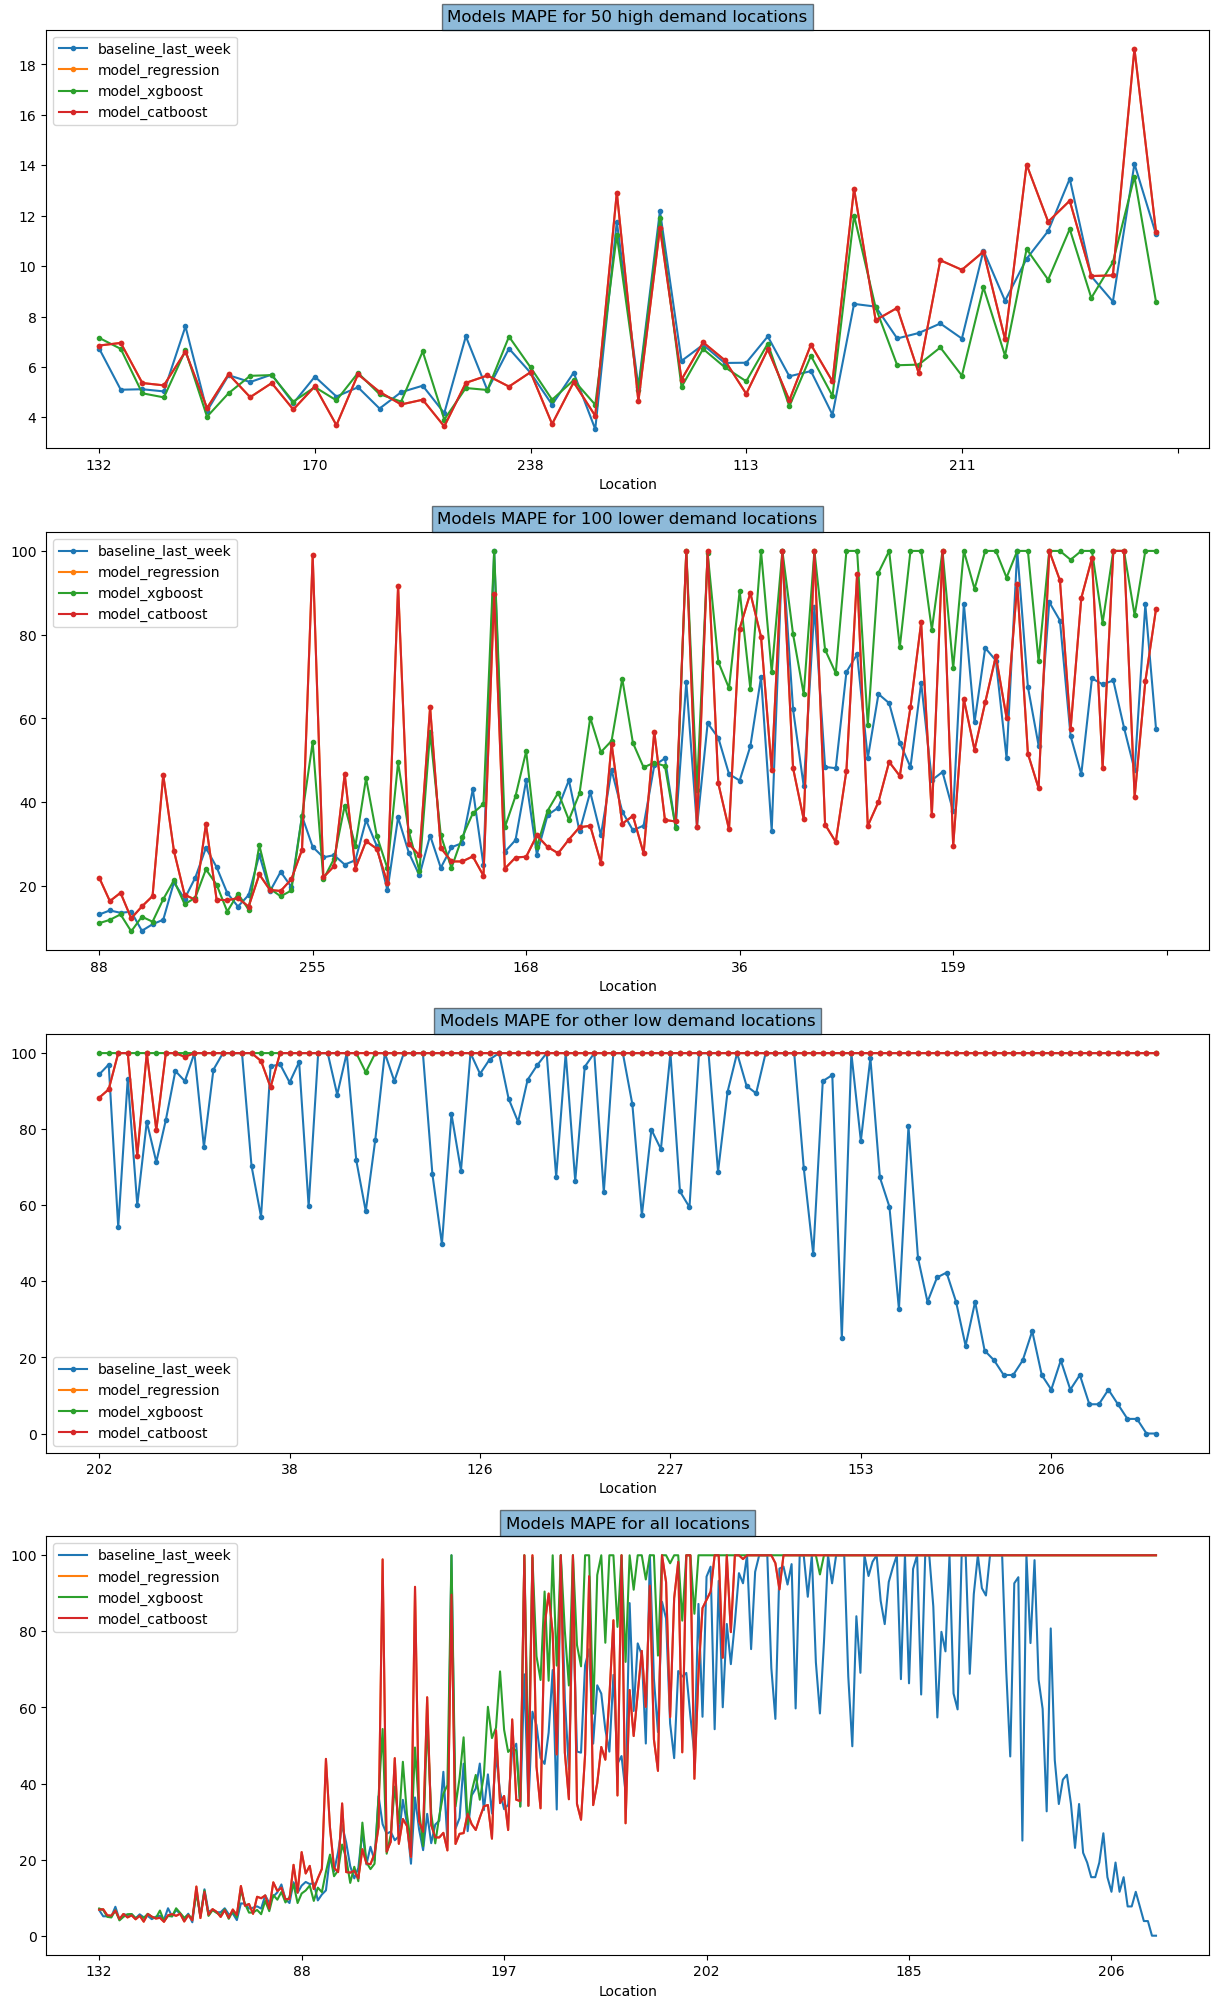

In [96]:
plot_mape(predictions_mean_error_dict, 'Location')

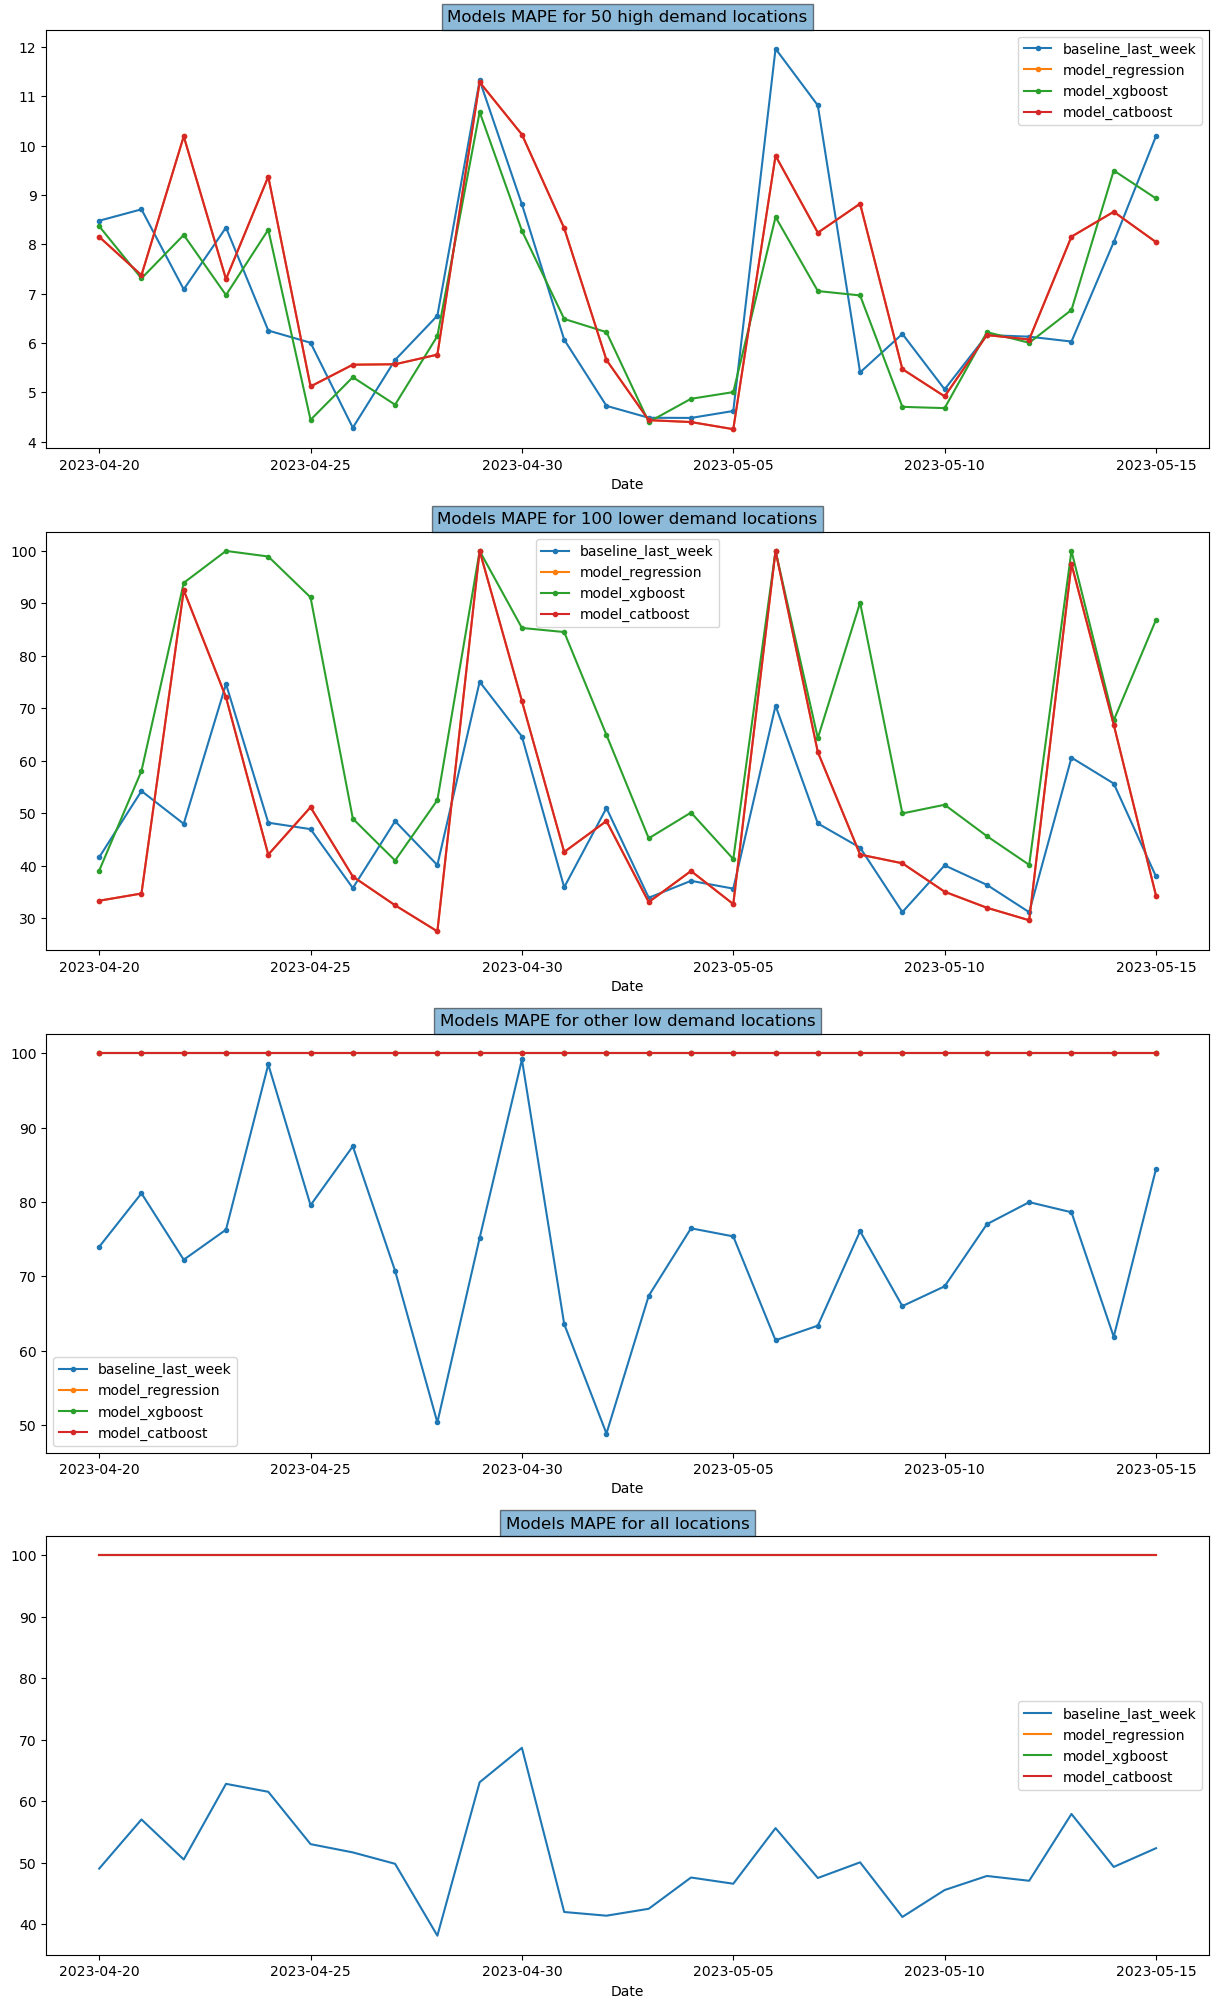

In [97]:
plot_mape(predictions_mean_error_dict, 'Date')

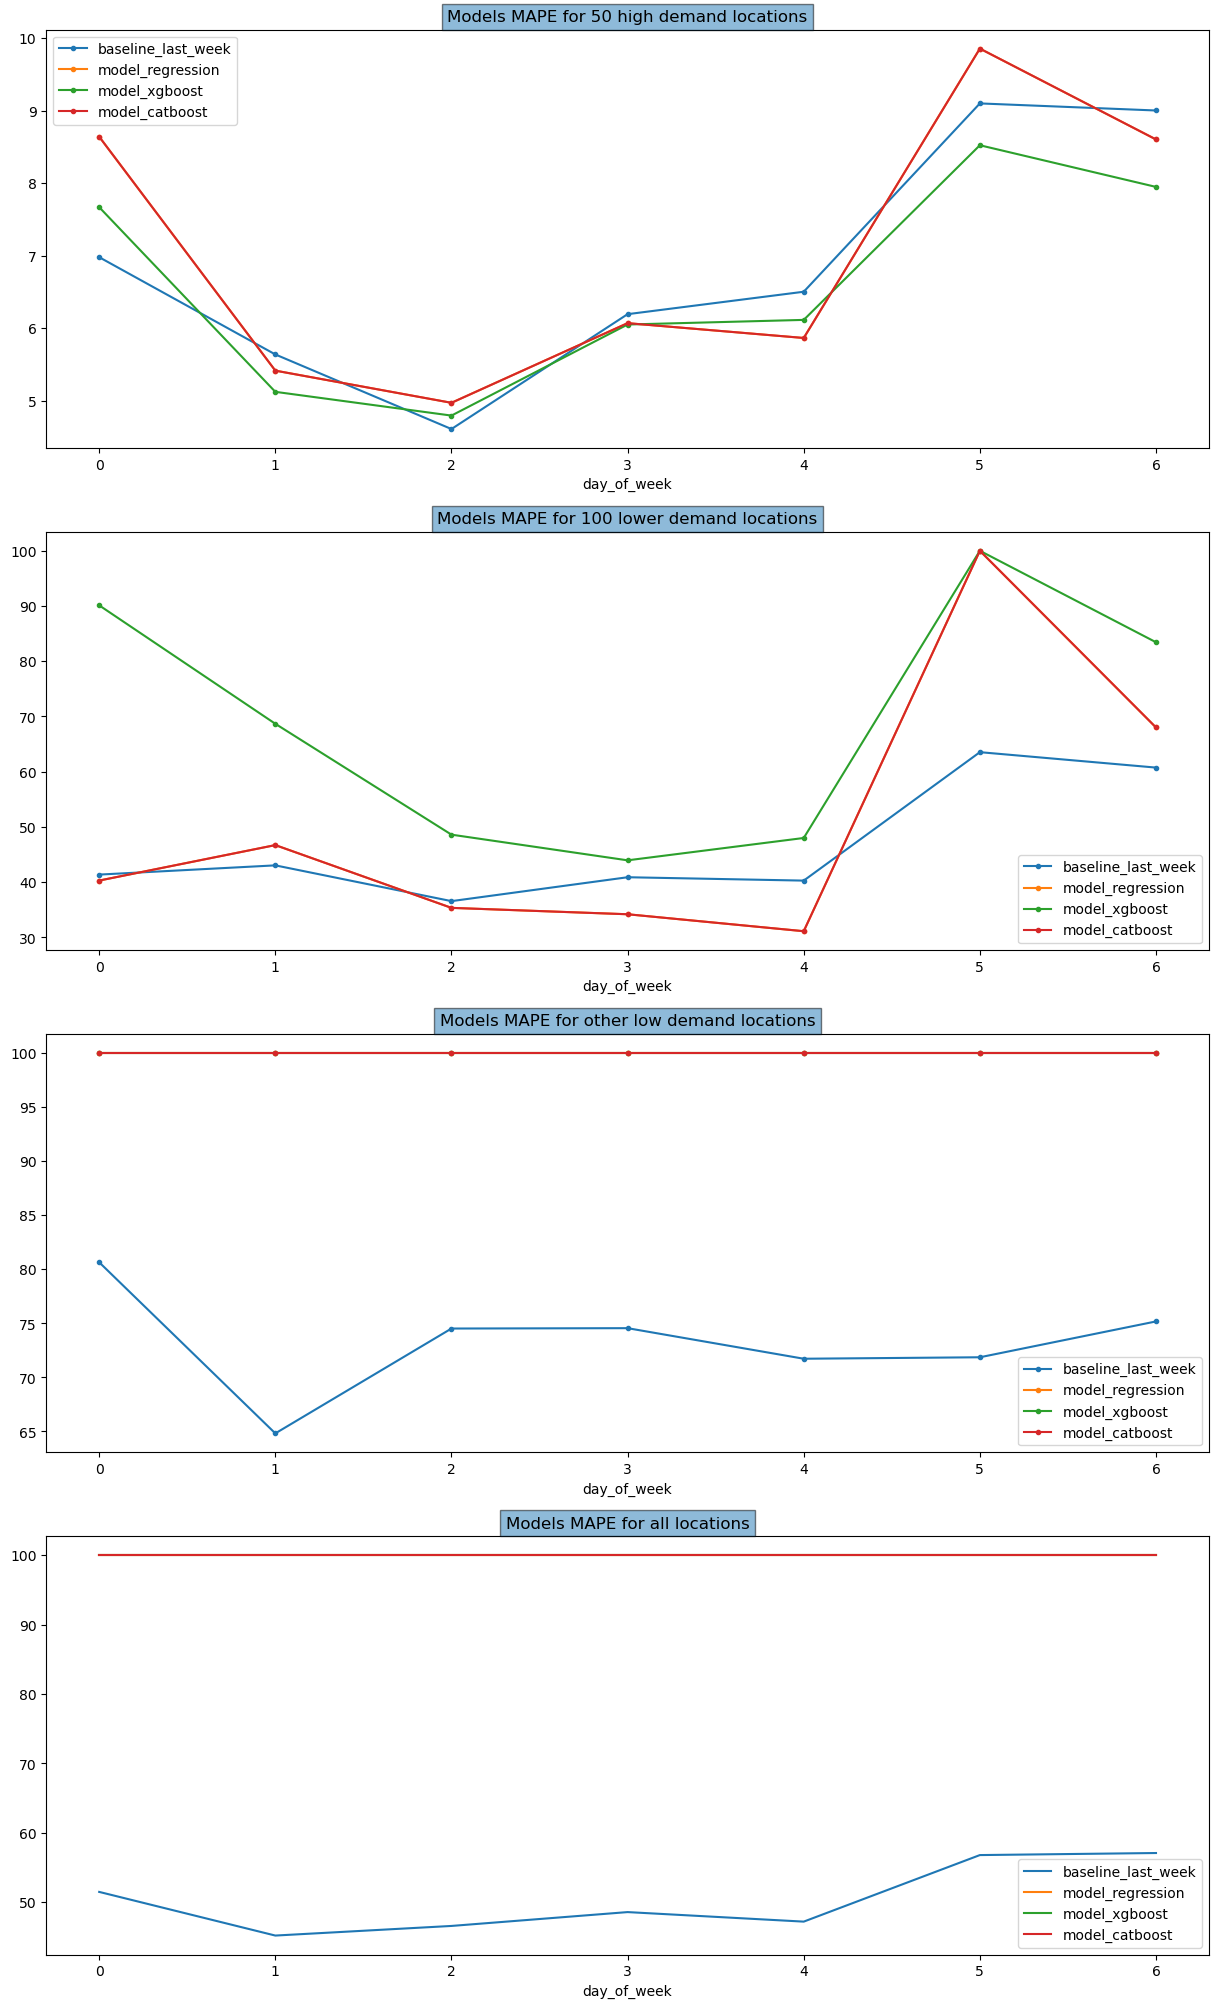

In [98]:
plot_mape(predictions_mean_error_dict, 'day_of_week')

### Plot MAE

In [99]:
def plot_mae(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):

            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='mae',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='mae',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models MAE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models MAE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models MAE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models MAE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


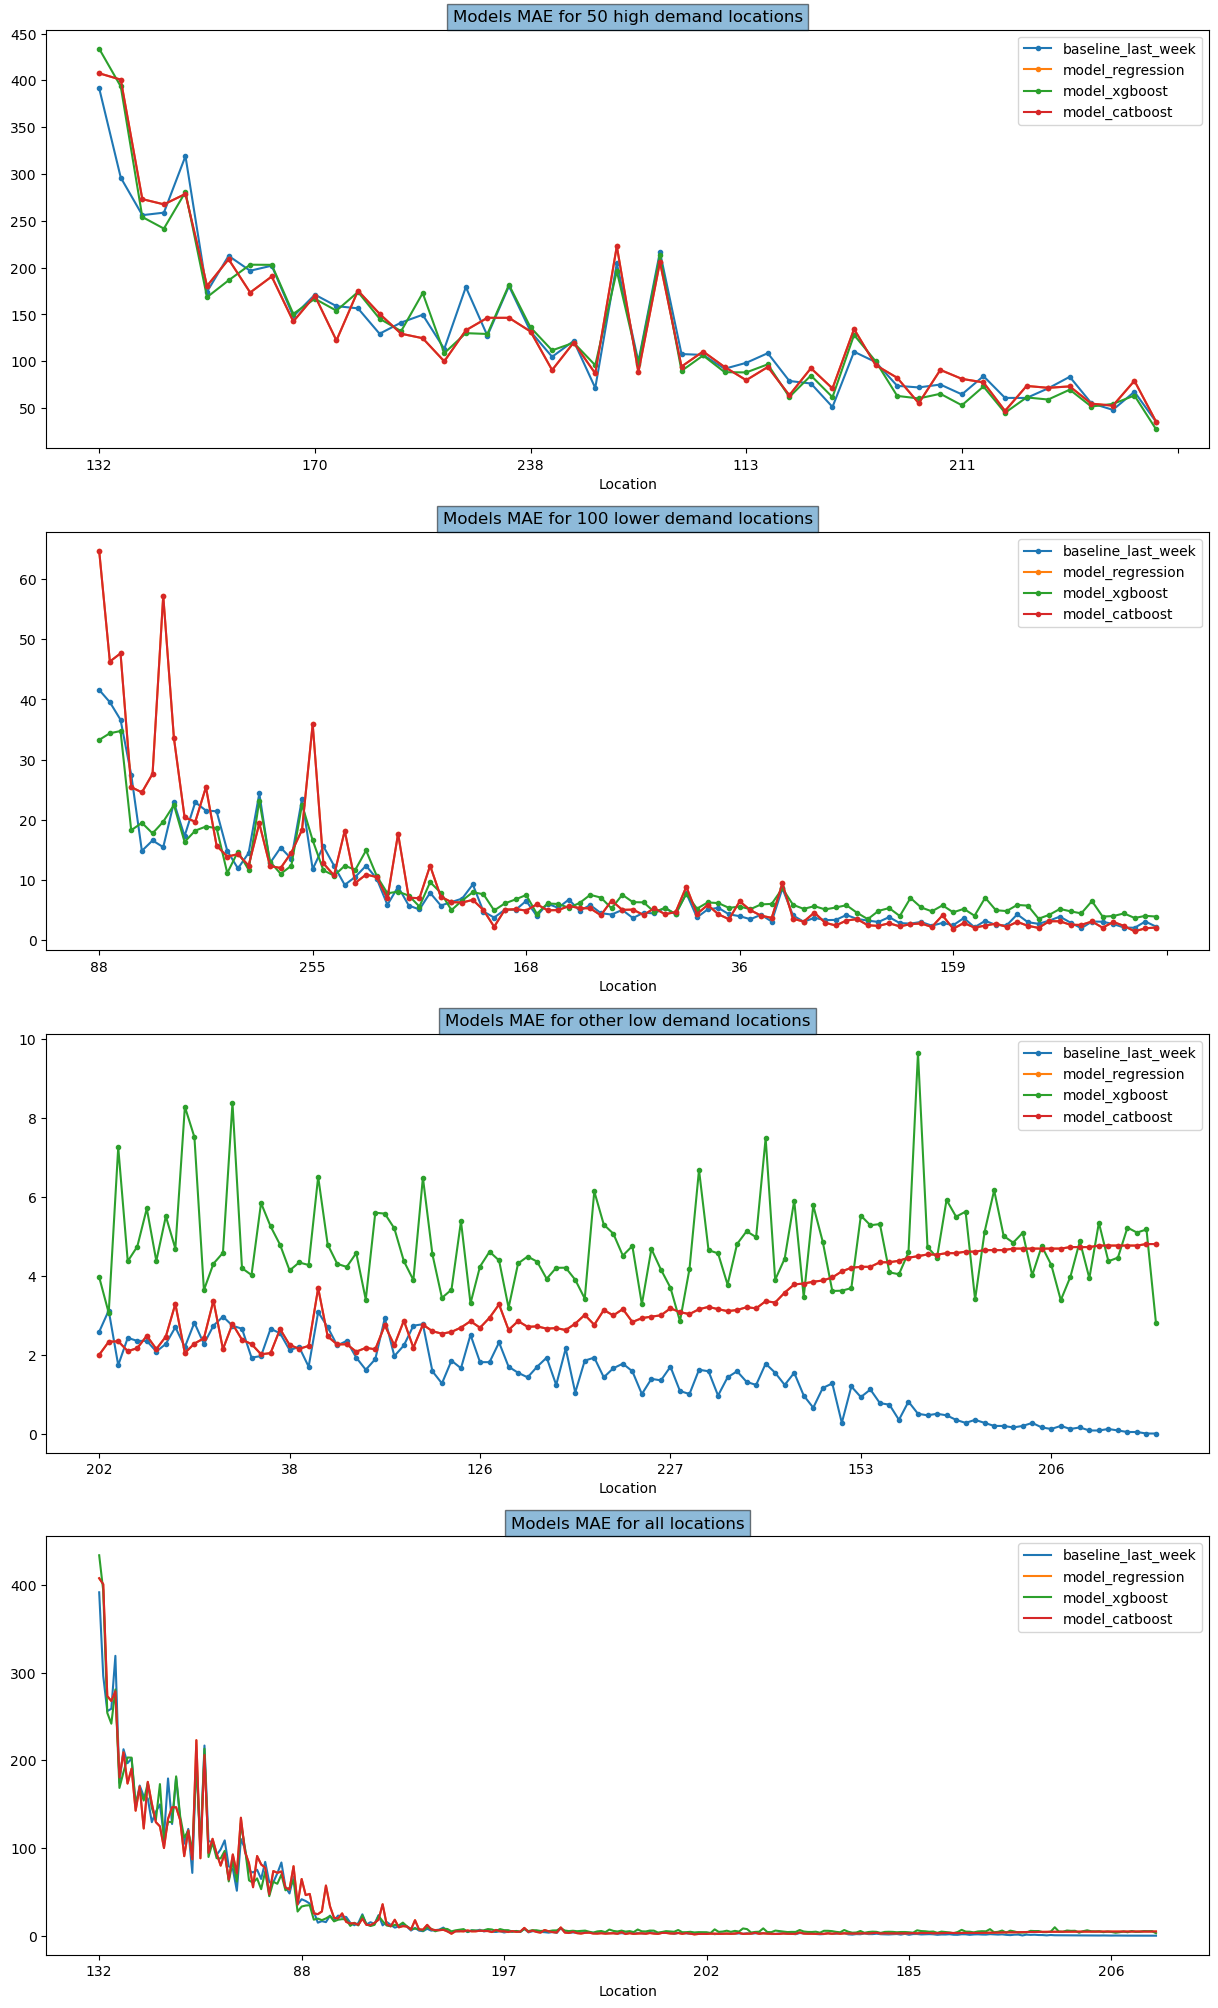

In [100]:
plot_mae(predictions_mean_error_dict, 'Location')

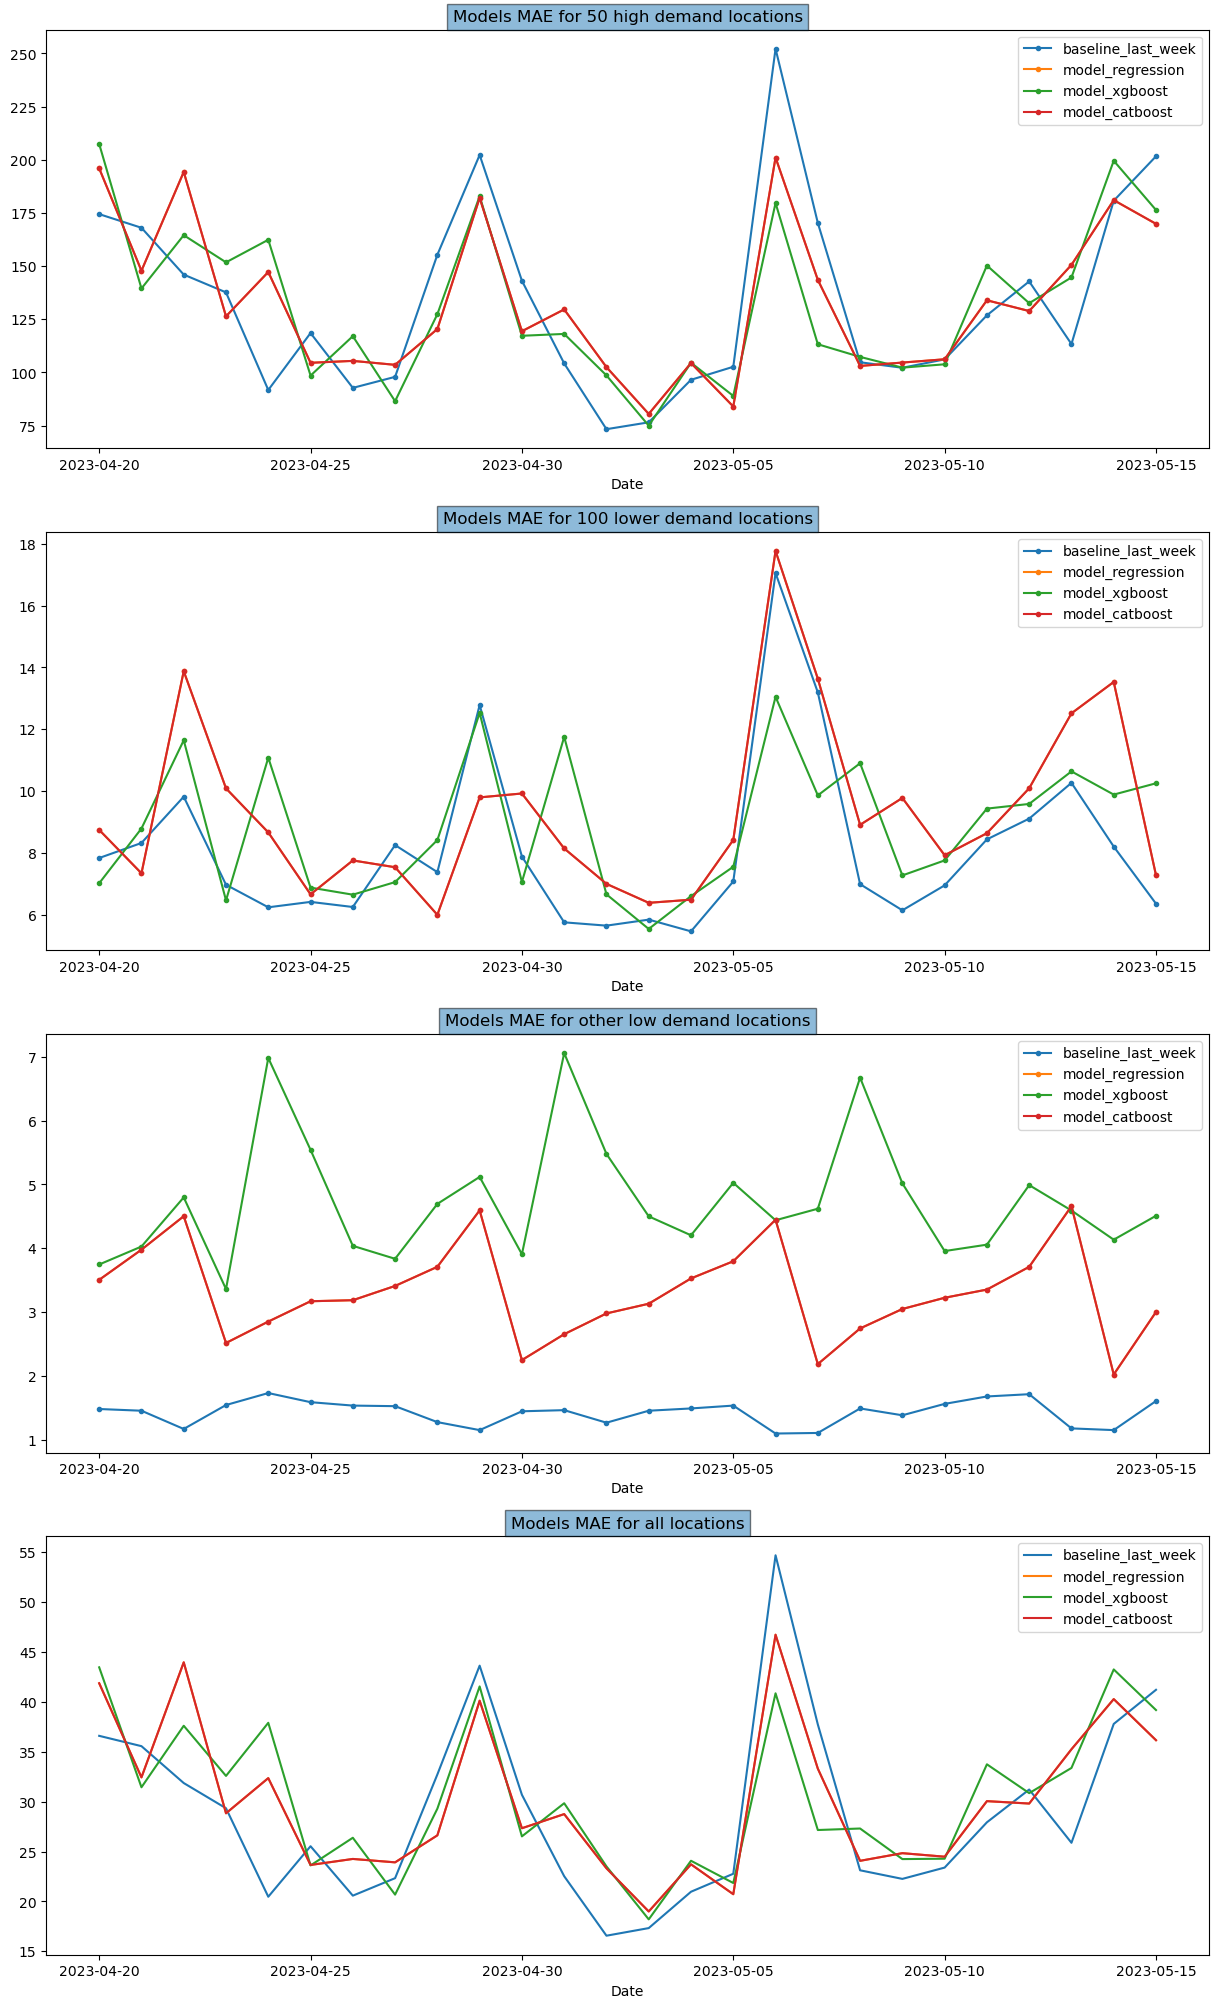

In [101]:
plot_mae(predictions_mean_error_dict, 'Date')

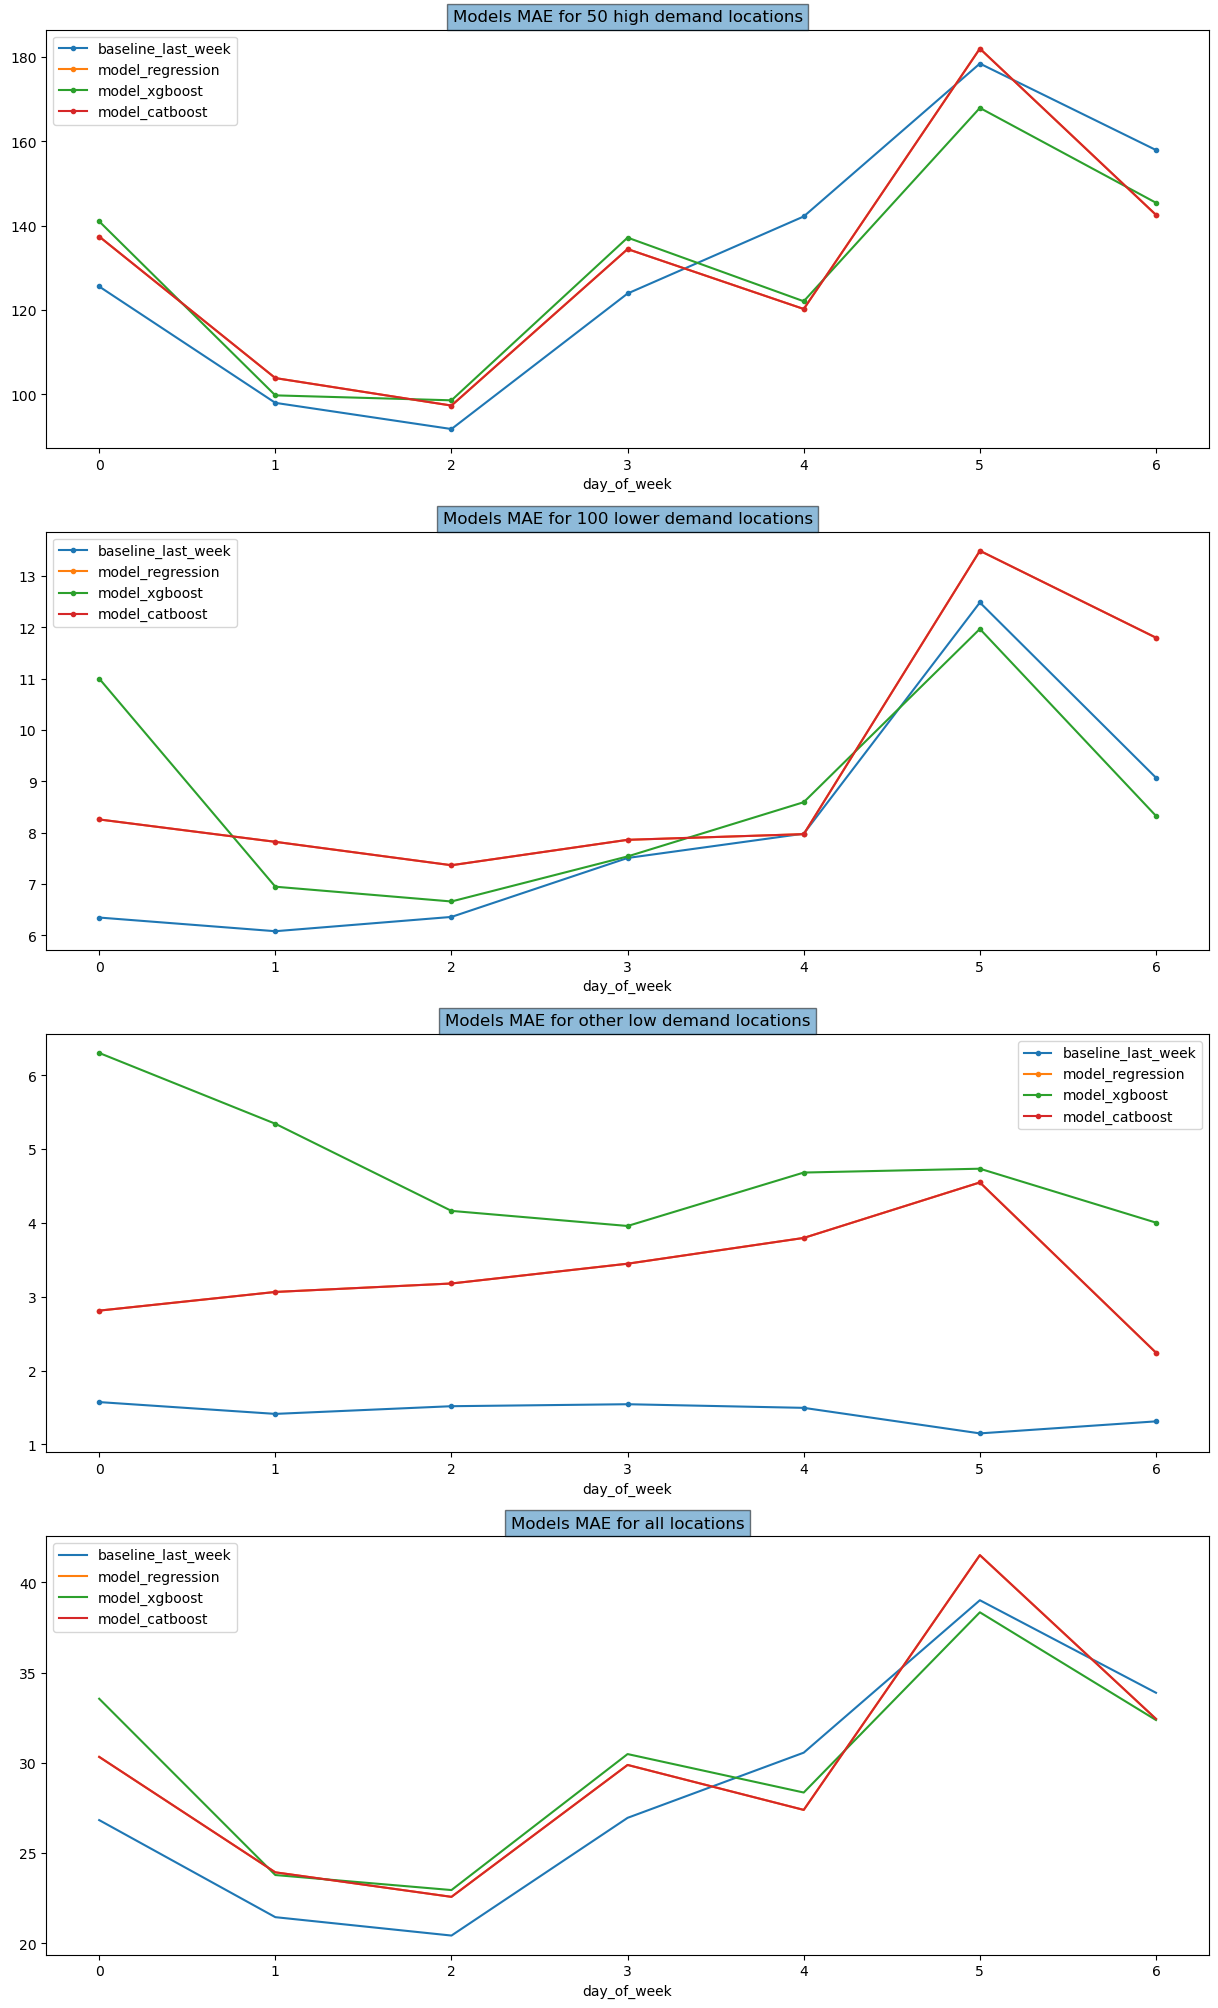

In [102]:
plot_mae(predictions_mean_error_dict, 'day_of_week')

### plot RMSE

In [103]:
def plot_rmse(predictions_mean_dict, per):
    
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15,25))
    
    for model,mean_df in predictions_mean_dict.items():
        high_demand_df = mean_df[per]['high_demand_loc']
        mid_demand_df = mean_df[per]['mid_demand_loc']
        low_demand_df = mean_df[per]['low_demand_loc']
        all_df = mean_df[per]['all_loc']
        if ((low_demand_df is not None) and 
            (mid_demand_df is not None)and 
            (high_demand_df is not None)and 
            (all_df is not None)):
            
            high_demand_df[per] = high_demand_df[per].astype(str)
            mid_demand_df[per] = mid_demand_df[per].astype(str)
            low_demand_df[per] = low_demand_df[per].astype(str)
            all_df[per] = all_df[per].astype(str)

            high_demand_df['rmse'] = np.sqrt(high_demand_df['mse'])
            mid_demand_df['rmse'] = np.sqrt(mid_demand_df['mse'])
            low_demand_df['rmse'] = np.sqrt(low_demand_df['mse'])
            all_df['rmse'] = np.sqrt(all_df['mse'])

            high_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[0], label=model)            
            mid_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[1],label=model)
            low_demand_df.plot(x=per,y='rmse',kind='line',marker='.',ax = axes[2],label=model)
            all_df.plot(x=per,y='rmse',kind='line',ax = axes[3],label=model)

    axes[0].set_title('Models RMSE for '+str(HIGH_DEMAND_NUMS)+' high demand locations', bbox=dict( alpha=0.5)) 
    axes[1].set_title('Models RMSE for '+str(MID_DEMAND_NUMS)+' lower demand locations', bbox=dict( alpha=0.5)) 
    axes[2].set_title('Models RMSE for other low demand locations', bbox=dict( alpha=0.5)) 
    axes[-1].set_title('Models RMSE for all locations', bbox=dict(alpha=0.5))

    plot_name = SAVE_PLOT_PATH + 'ME_plot per '+per+'.svg'
    plt.savefig(plot_name, format='svg', dpi=1200)  


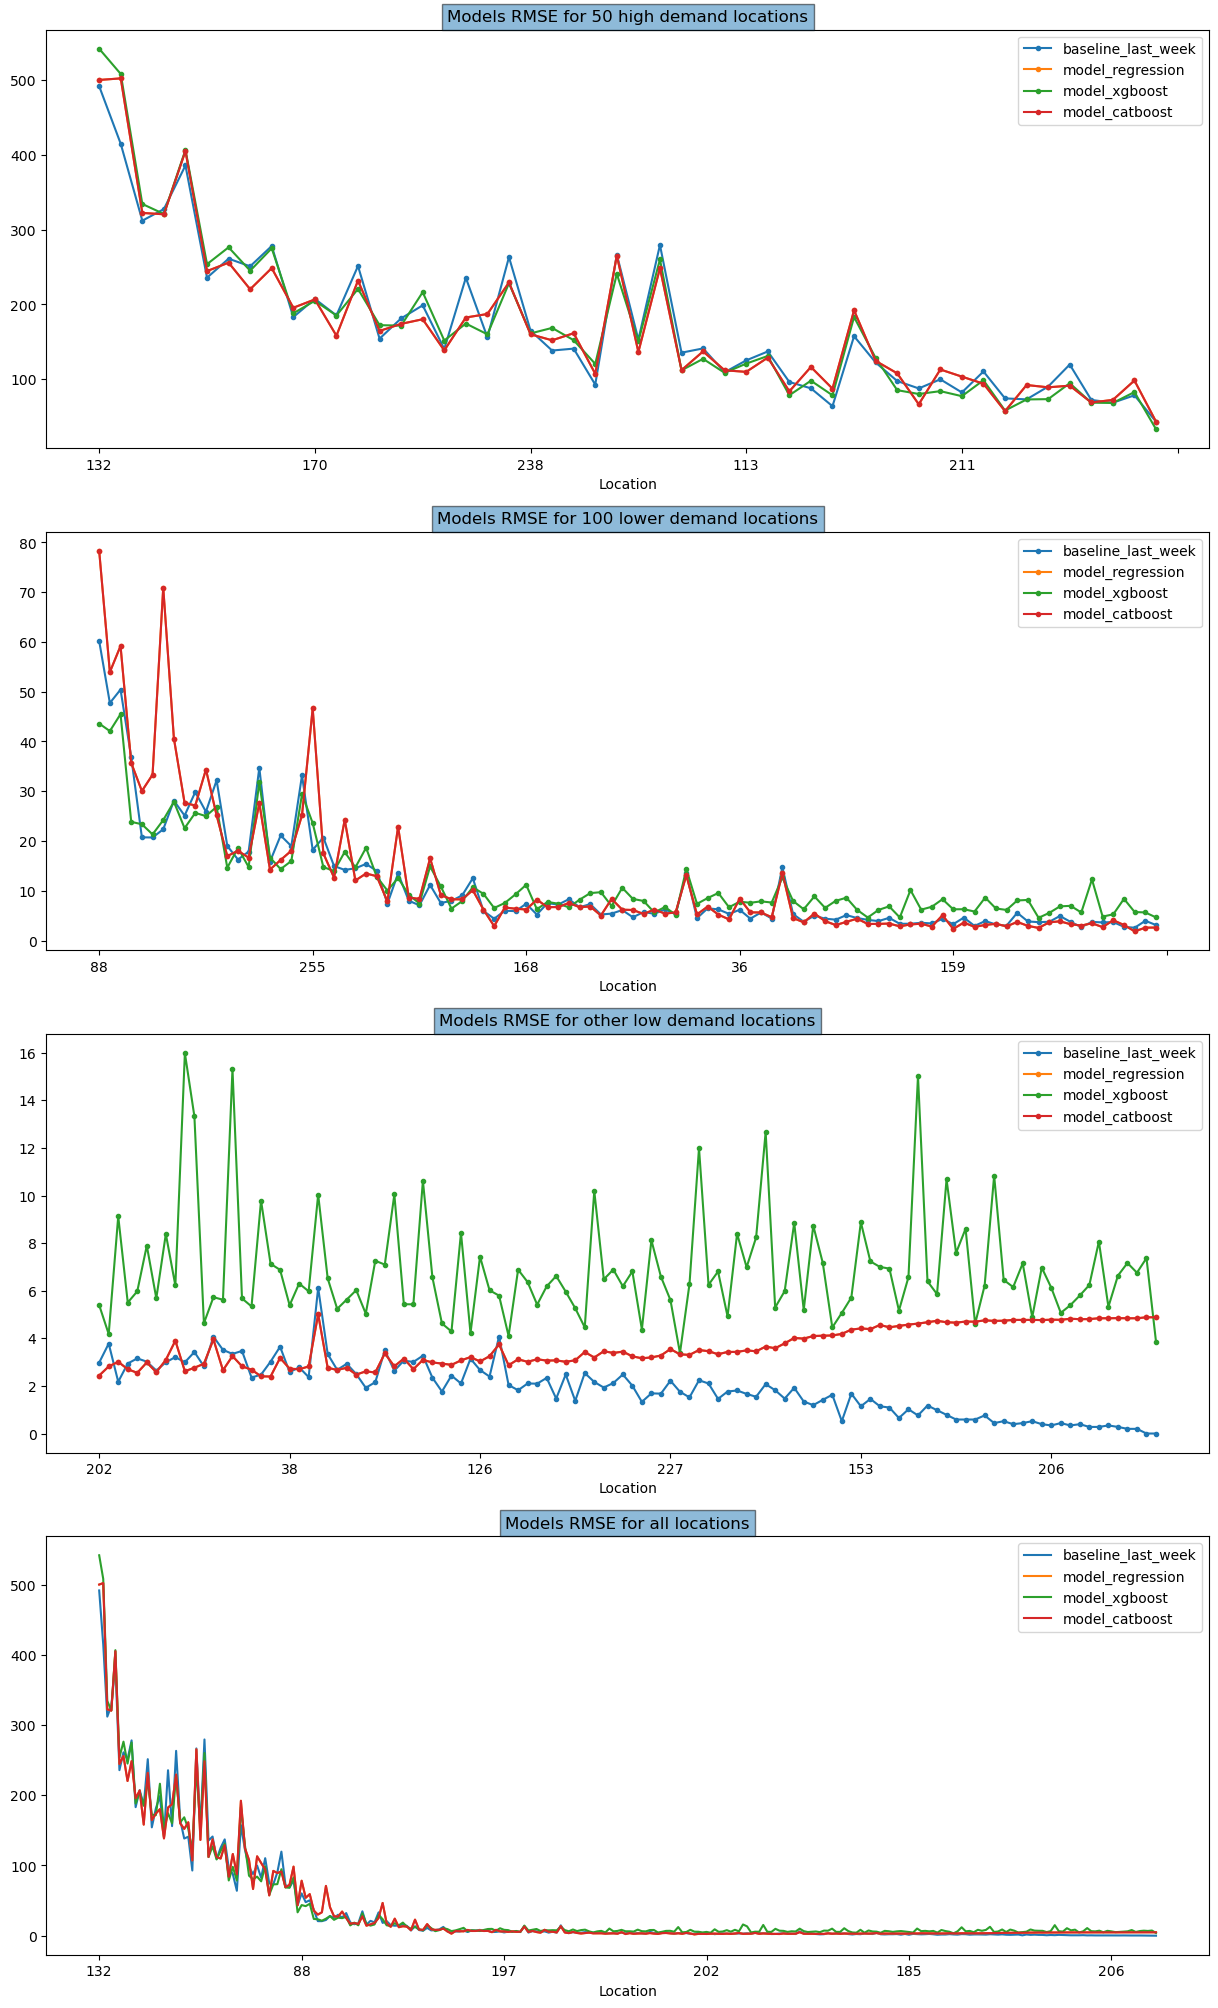

In [104]:
plot_rmse(predictions_mean_error_dict, 'Location')

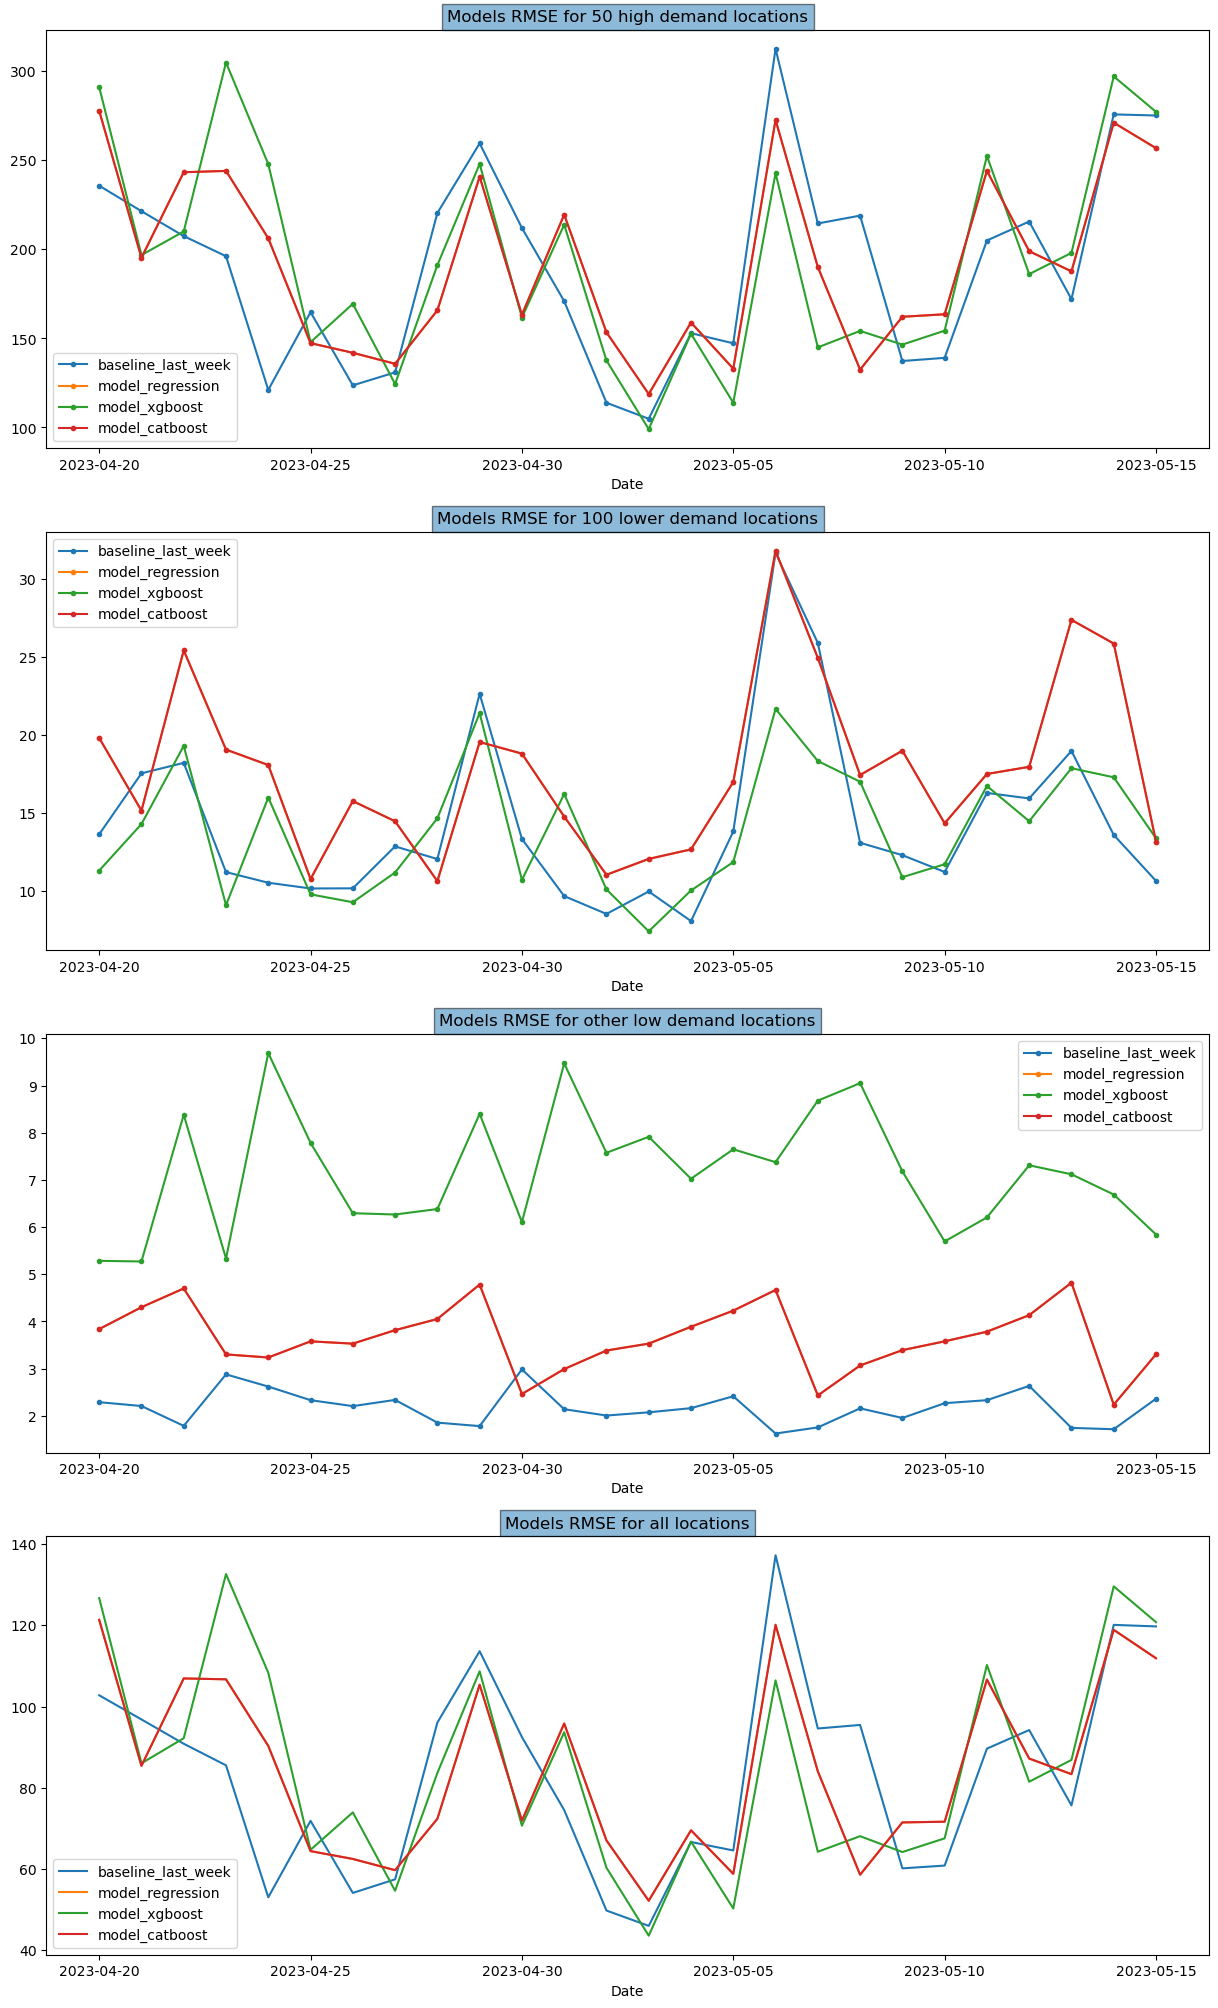

In [105]:
plot_rmse(predictions_mean_error_dict, 'Date')

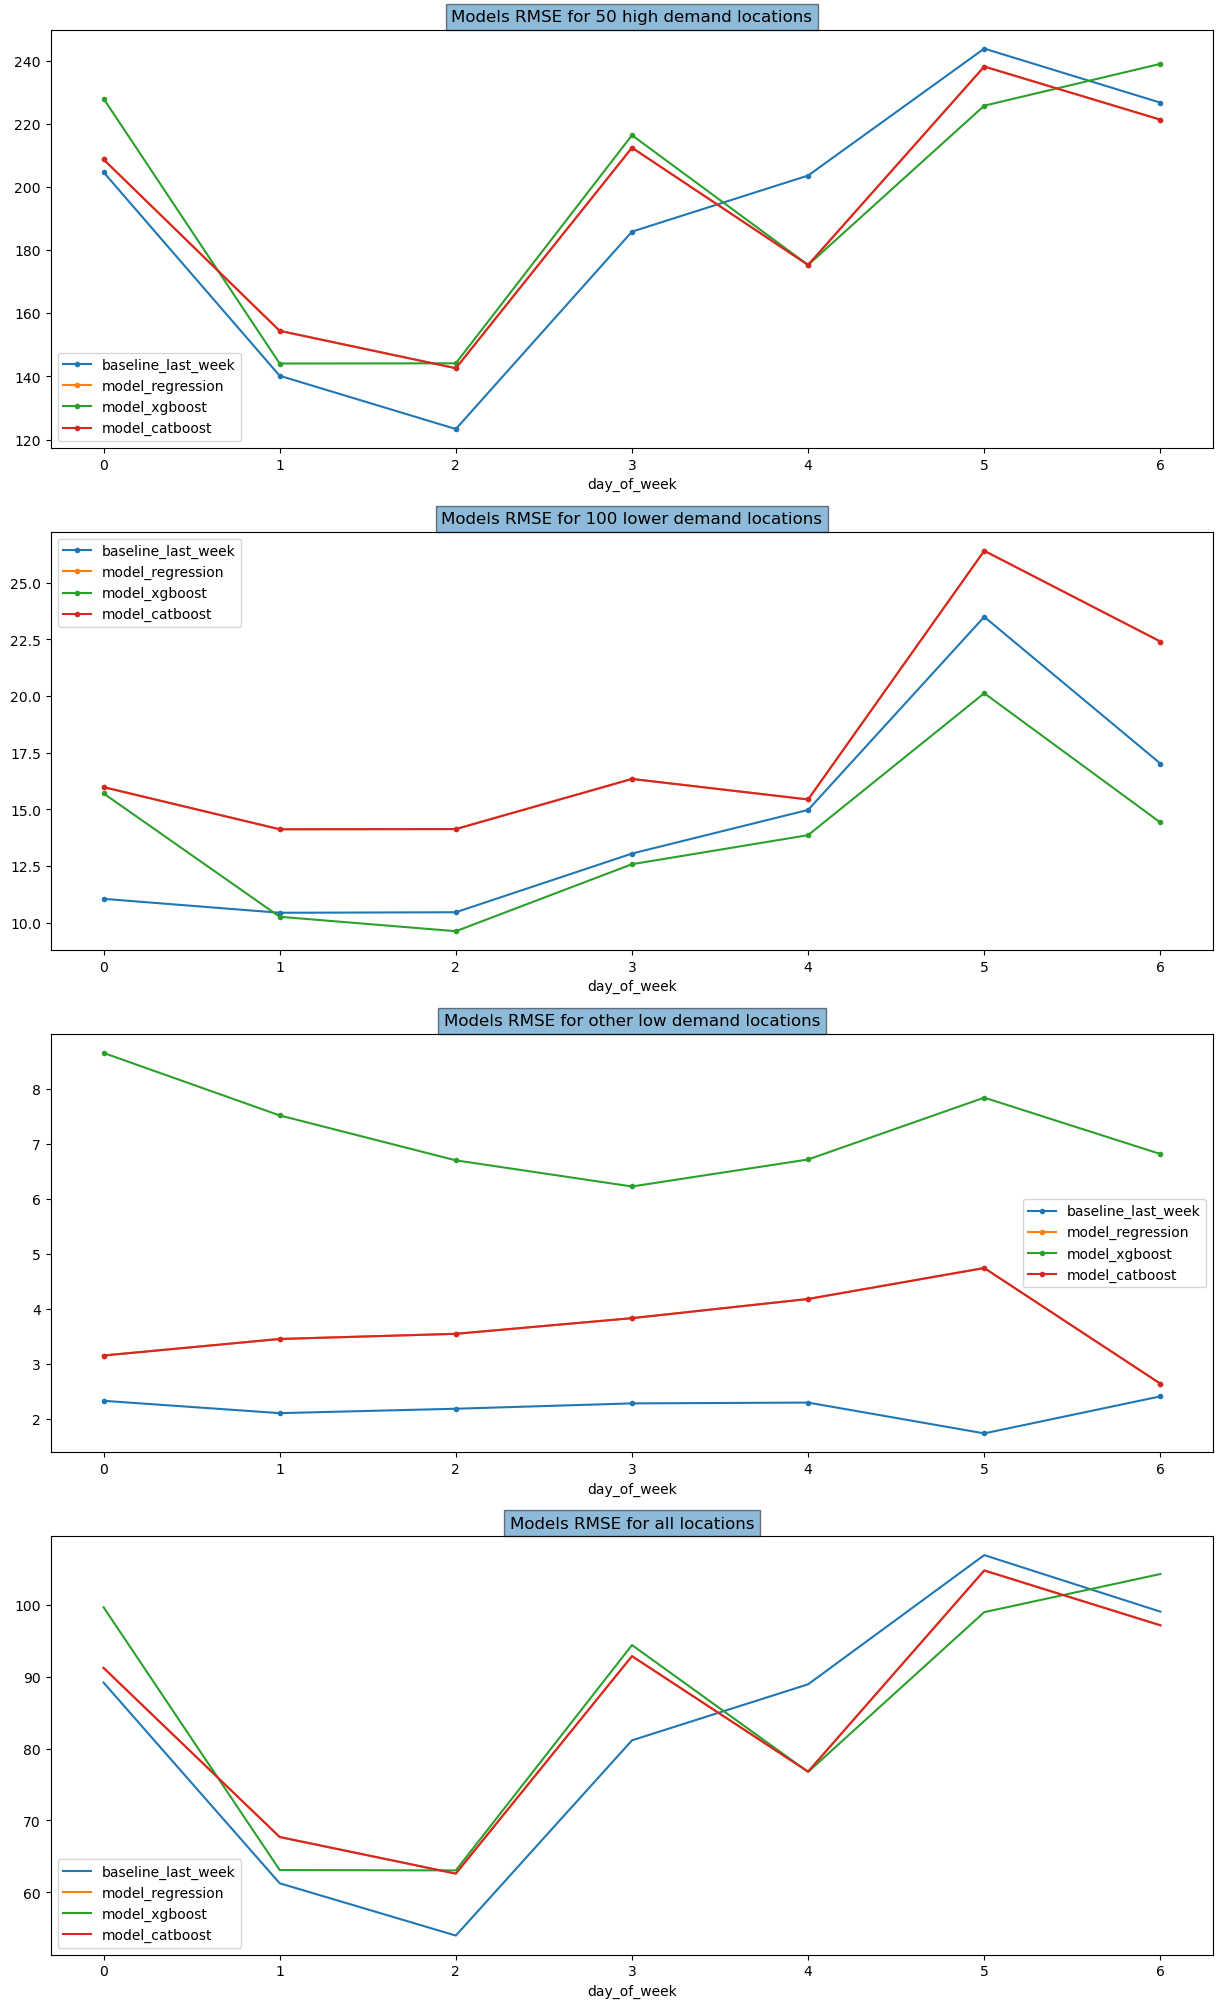

In [106]:
plot_rmse(predictions_mean_error_dict, 'day_of_week')

# Table of Results

In [107]:
def create_table_errors(predictions_dict, report_dict):
    for model, error_df in predictions_dict.items():
        if error_df is not None:
            report_dict['all_locations']['MAE'][model] = error_df['error'].mean()            
            report_dict['all_locations']['RMSE'][model] = np.sqrt(error_df['squared_error'].mean())
            report_dict['all_locations']['MAPE'][model] = error_df['percentage_error'].mean()

            error_high_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][:HIGH_DEMAND_NUMS]['Location'])]
            error_mid_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS:HIGH_DEMAND_NUMS+MID_DEMAND_NUMS]['Location'])]
            error_low_demand_df = error_df.loc[error_df['Location'].isin(sorted_locations_dict[model][HIGH_DEMAND_NUMS+MID_DEMAND_NUMS:]['Location'])]

            report_dict['high_demand_locations']['MAE'][model] = error_high_demand_df['error'].mean()            
            report_dict['high_demand_locations']['RMSE'][model] = np.sqrt(error_high_demand_df['squared_error'].mean())
            report_dict['high_demand_locations']['MAPE'][model] = error_high_demand_df['percentage_error'].mean()
            
            report_dict['mid_demand_locations']['MAE'][model] = error_mid_demand_df['error'].mean()            
            report_dict['mid_demand_locations']['RMSE'][model] = np.sqrt(error_mid_demand_df['squared_error'].mean())
            report_dict['mid_demand_locations']['MAPE'][model] = error_mid_demand_df['percentage_error'].mean()
            
            report_dict['low_demand_locations']['MAE'][model] = error_low_demand_df['error'].mean()            
            report_dict['low_demand_locations']['RMSE'][model] = np.sqrt(error_low_demand_df['squared_error'].mean())
            report_dict['low_demand_locations']['MAPE'][model] = error_low_demand_df['percentage_error'].mean()
    return report_dict

In [108]:
report_dict = create_table_errors(predictions_dict, report_dict)
report_df = pd.DataFrame.from_dict({(i,j): report_dict[i][j] 
                            for i in report_dict.keys() 
                            for j in report_dict[i].keys()},
                            orient='index')

report_df.index = pd.MultiIndex.from_tuples(report_df.index)
report_df = report_df.T

In [109]:
df = pd.DataFrame(report_df,
                  index=pd.Index(['baseline_last_week', 'model_regression', 'model_xgboost']),
                  columns=pd.MultiIndex.from_product([['high_demand_locations', 'mid_demand_locations', 'low_demand_locations', 'all_locations'],
                                                      ['MAPE','MAE','RMSE']], names=['location category:', 'Error Metrics:']))


In [110]:
df

location category: high_demand_locations                          \
Error Metrics:                      MAPE         MAE        RMSE   
baseline_last_week              6.993670  133.924615  198.002012   
model_regression                7.203104  133.491977  199.304994   
model_xgboost                   6.728998  132.694656  203.320012   

location category: mid_demand_locations                       \
Error Metrics:                     MAPE       MAE       RMSE   
baseline_last_week            47.138340  8.110530  15.304551   
model_regression              52.834288  9.348941  18.645196   
model_xgboost                 71.791774  8.866635  14.457703   

location category: low_demand_locations                     all_locations  \
Error Metrics:                     MAPE       MAE      RMSE          MAPE   
baseline_last_week            73.605941  1.426854  2.203503     50.750181   
model_regression             267.188636  3.313472  3.718083    134.819676   
model_xgboost                317.134523  4.741692  7.261146    163.207808   

location category:                        
Error Metrics:            MAE       RMSE  
baseline_last_week  29.024238  86.546078  
model_regression    30.221315  87.382905  
model_xgboost       30.487040  88.900752

In [111]:
df.style.format('{:.2f}')